<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment11/Session11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip3 install albumentations

In [2]:
########################################
#  Calling  heavenly Gods
########################################
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import *
from model import *
import torch.nn as nn
import torch.nn.functional as F
#from base_functions import *
from training import *
from torchsummary import summary

# getting the data
trainloader, testloader, testData, classes = getData()



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Utilize GPU if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model11().to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary    
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


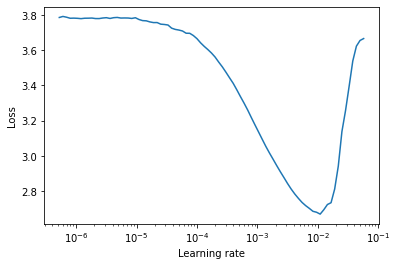

In [4]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=0.1, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [5]:
# Training starts here
Training(24,model,device, trainloader, testloader,.01 )


  0%|          | 0/100 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.4814940690994263 Batch_id=99 Accuracy=33.31: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 1.4232, Accuracy: 4738/10000 (47.38%)

EPOCH: 1


Loss=1.1507842540740967 Batch_id=99 Accuracy=52.69: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 1.1769, Accuracy: 6001/10000 (60.01%)

EPOCH: 2


Loss=0.8626724481582642 Batch_id=99 Accuracy=62.91: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.8338, Accuracy: 7063/10000 (70.63%)

EPOCH: 3


Loss=0.810080885887146 Batch_id=99 Accuracy=69.44: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.6921, Accuracy: 7698/10000 (76.98%)

EPOCH: 4


Loss=0.6449285745620728 Batch_id=99 Accuracy=72.04: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.7663, Accuracy: 7553/10000 (75.53%)

EPOCH: 5


Loss=0.6891194581985474 Batch_id=99 Accuracy=77.57: 100%|██████████| 100/100 [01:34<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.5897, Accuracy: 8026/10000 (80.26%)

EPOCH: 6


Loss=0.6906470656394958 Batch_id=99 Accuracy=79.10: 100%|██████████| 100/100 [01:34<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.7327, Accuracy: 7800/10000 (78.00%)

EPOCH: 7


Loss=0.6438218355178833 Batch_id=99 Accuracy=80.86: 100%|██████████| 100/100 [01:34<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.5537, Accuracy: 8340/10000 (83.40%)

EPOCH: 8


Loss=0.3782230317592621 Batch_id=99 Accuracy=85.23: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4732, Accuracy: 8422/10000 (84.22%)

EPOCH: 9


Loss=0.34970349073410034 Batch_id=99 Accuracy=87.33: 100%|██████████| 100/100 [01:34<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4539, Accuracy: 8562/10000 (85.62%)

EPOCH: 10


Loss=0.39684635400772095 Batch_id=99 Accuracy=88.17: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4667, Accuracy: 8525/10000 (85.25%)

EPOCH: 11


Loss=0.323088139295578 Batch_id=99 Accuracy=89.26: 100%|██████████| 100/100 [01:34<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.3860, Accuracy: 8775/10000 (87.75%)

EPOCH: 12


Loss=0.29938727617263794 Batch_id=99 Accuracy=90.70: 100%|██████████| 100/100 [01:34<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4669, Accuracy: 8617/10000 (86.17%)

EPOCH: 13


Loss=0.2577516436576843 Batch_id=99 Accuracy=91.79: 100%|██████████| 100/100 [01:34<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4061, Accuracy: 8740/10000 (87.40%)

EPOCH: 14


Loss=0.23870620131492615 Batch_id=99 Accuracy=92.59: 100%|██████████| 100/100 [01:34<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4077, Accuracy: 8750/10000 (87.50%)

EPOCH: 15


Loss=0.18904507160186768 Batch_id=99 Accuracy=93.39: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.3609, Accuracy: 8883/10000 (88.83%)

EPOCH: 16


Loss=0.14875845611095428 Batch_id=99 Accuracy=93.71: 100%|██████████| 100/100 [01:34<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4189, Accuracy: 8775/10000 (87.75%)

EPOCH: 17


Loss=0.14484600722789764 Batch_id=99 Accuracy=94.30: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.3612, Accuracy: 8920/10000 (89.20%)

EPOCH: 18


Loss=0.14557990431785583 Batch_id=99 Accuracy=94.88: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.3971, Accuracy: 8854/10000 (88.54%)

EPOCH: 19


Loss=0.11199730634689331 Batch_id=99 Accuracy=95.30: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.3358, Accuracy: 8974/10000 (89.74%)

EPOCH: 20


Loss=0.1303691416978836 Batch_id=99 Accuracy=95.98: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.3306, Accuracy: 9022/10000 (90.22%)

EPOCH: 21


Loss=0.11317193508148193 Batch_id=99 Accuracy=96.44: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.3469, Accuracy: 9001/10000 (90.01%)

EPOCH: 22


Loss=0.12376675009727478 Batch_id=99 Accuracy=96.68: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.3380, Accuracy: 9024/10000 (90.24%)

EPOCH: 23


Loss=0.10920245200395584 Batch_id=99 Accuracy=97.10: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]



Test set: Average loss: 0.3355, Accuracy: 9012/10000 (90.12%)



In [6]:
# Calsswise accuracy 
ClassTestAccuracy(testloader,device,model,classes)

Accuracy of plane : 90 %
Accuracy of   car : 100 %
Accuracy of  bird : 84 %
Accuracy of   cat : 76 %
Accuracy of  deer : 89 %
Accuracy of   dog : 81 %
Accuracy of  frog : 94 %
Accuracy of horse : 100 %
Accuracy of  ship : 93 %
Accuracy of truck : 96 %


In [0]:

#MissClassifedImage(testData,model,device,3,classes)

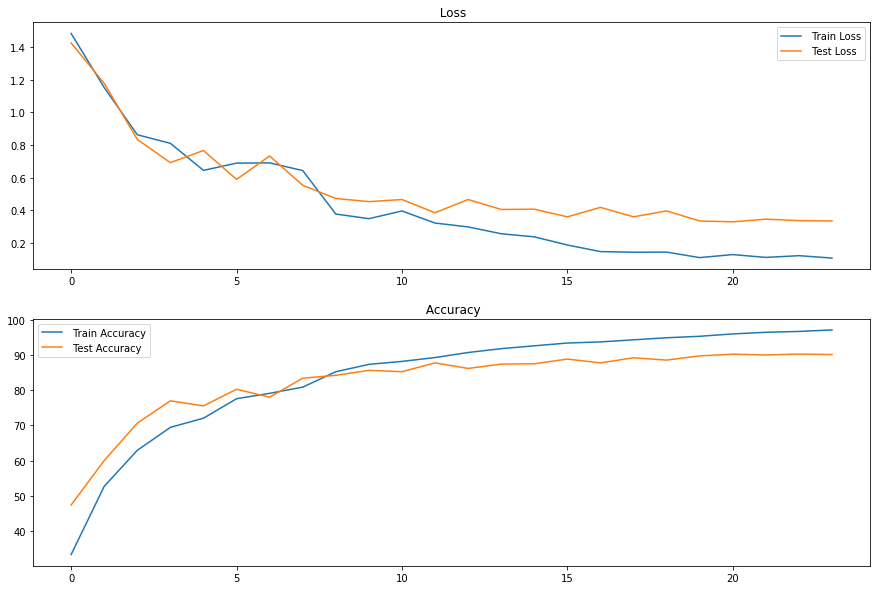

In [8]:
plotPerformanceGraph( )

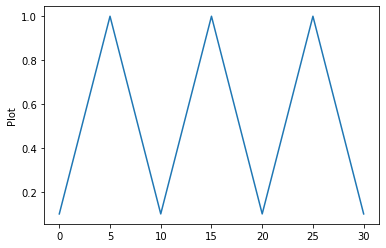

In [9]:
import matplotlib.pyplot as plt

def OneCyclePolicy(LRmax, step, iterations):
    LRmin = LRmax/10;
    LRvalues =[]
    for x in range(0,iterations+1):
        cycle = int(1+ (x/(2*step)))
        a = abs((x/step)-(2*cycle)+1)
        LRt = LRmin + ((LRmax-LRmin)*(1-a))
        LRvalues.append(LRt)
    return LRvalues
val = OneCyclePolicy(1,5,30)
plt.plot(val)
plt.ylabel('Plot')
plt.show()


